## LTP R demo

Illustrating [Digital economy and society statistics - households and individuals](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Digital_economy_and_society_statistics_-_households_and_individuals)

Figure 1: Internet access and broadband internet connections of households, EU-28, 2008-2018 (% of all households)

In [1]:
library(ggplot2)
library(tidyr)
library(repr)
library(dplyr)
library(devtools)
library(restatapi)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: usethis
restatapi: - config file with the API version 1 loaded from GitHub (the 'current' API version number is 1).
           - 2 from the 4 cores are used for parallel computing.
           - 'libcurl' will be used for file download.
           - the Table of contents (TOC) was not pre-loaded into the deafult cache ('.restatapi_env').


* Using get_eurostat_data to pull data from the first dataset we want. 
I've called it dataset1_1 so we can differentiate from the other dataset we are pulling 

In [2]:
dataset1_1 <- get_eurostat_data(id="isoc_ci_in_h", 
filters = list(geo = "EU28", unit = "PC_HH", hhtyp = "TOTAL"),
date_filter = "2008:2018")

* The first dataset I pulled does not have the same variables as the second one. In order to differentiate them, I will create a new variable in my first dataset and call it "INT_ACCESS"  

In [3]:
dataset1_1$indic_is <- "INT_ACCESS"

* And now data from the other dataset

In [4]:
dataset1_2 <- get_eurostat_data(id="isoc_ci_it_h", 
filters = list(geo = "EU28", unit = "PC_HH", hhtyp = "TOTAL", indic_is = "H_BROAD"),
date_filter = "2008:2018")

* Combining the datasets by row using r(ow)bind to transform it into one dataset

In [5]:
dataset_fig1 <- rbind(dataset1_1, dataset1_2)

* Converting the years in the dataset to numerical values. This is necessary for line graphs! 

In [6]:
dataset_fig1$time<-as.numeric(as.character(dataset_fig1$time))

* If you like, you can have a sneakpeak of the dataset using head() just to make sure everything looks okay before you go ahead with the visualisation. You can also just type in the name of the dataset and run it in order to see the full dataset. 

In [7]:
dataset_fig1

unit,hhtyp,geo,time,values,indic_is
<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
PC_HH,TOTAL,EU28,2008,60,INT_ACCESS
PC_HH,TOTAL,EU28,2009,66,INT_ACCESS
PC_HH,TOTAL,EU28,2010,70,INT_ACCESS
PC_HH,TOTAL,EU28,2011,73,INT_ACCESS
PC_HH,TOTAL,EU28,2012,76,INT_ACCESS
PC_HH,TOTAL,EU28,2013,79,INT_ACCESS
PC_HH,TOTAL,EU28,2014,81,INT_ACCESS
PC_HH,TOTAL,EU28,2015,83,INT_ACCESS
PC_HH,TOTAL,EU28,2016,85,INT_ACCESS


### Make your graph!

* options(repr.plot.width/height): changes the size of your graph. 

* ggplot2: the package that facilitates data visualisation.

* data: the dataframe/dataset you would like ggplot to visualise. 

* aes: your axes! 

* geom_line(), geom_bar() and more: define what type of graph you would like to build. I am building a line graph, so I am using geom_line().

* scale_colour_manual: controls the colours of your lines, the labels for your lines, and the name of the legend (which in my case, is blank). 

* ggtitle: the name of the graph.

* scale_y/x_continuous: changes the scale of your x and y axes.

* theme(text = element_text: changes the size of your font. 

* y/xlab: labels the x and y axes. 

More information: 
* ggplot2 package documentation: 



In [8]:
options(repr.plot.width=20, repr.plot.height=10)

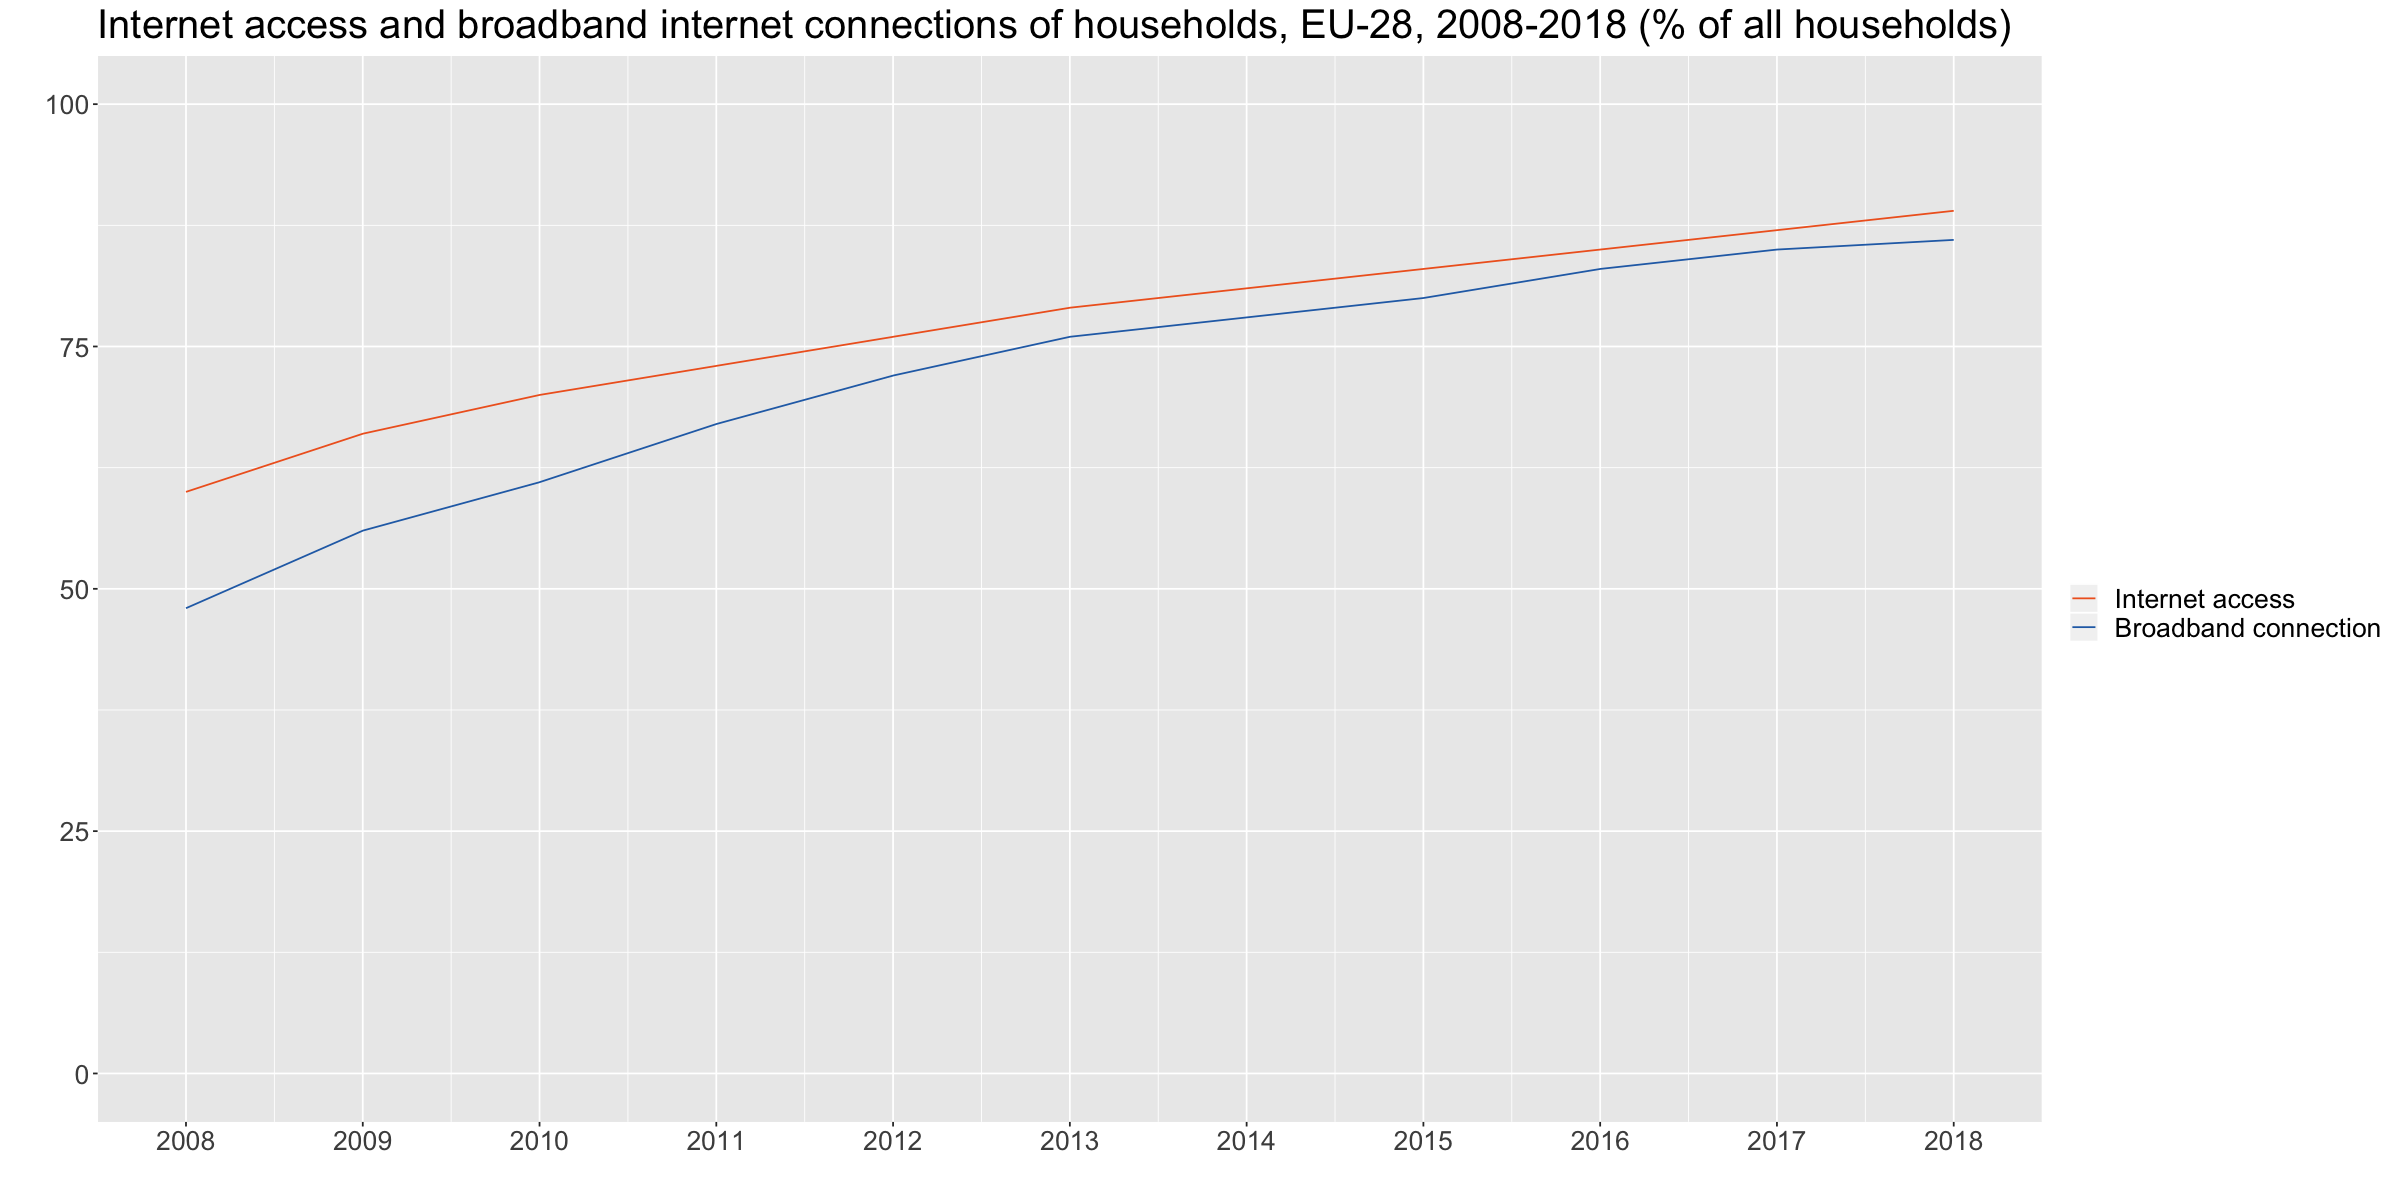

In [9]:
ggplot(data=dataset_fig1, aes(x=time, y=values, group=factor(indic_is), 
color=factor(indic_is))) +

geom_line() +

scale_color_manual(values = c("#F06423", "#276EB4"), labels = c("Internet access", 
"Broadband connection"), , name = " ") +

ggtitle("Internet access and broadband internet connections of households, EU-28, 2008-2018 (% of all households)") +
  
scale_y_continuous(limits = c(0, 100), breaks = seq(0, 180, by = 25)) +
scale_x_continuous(limits = c(2008, 2018), breaks = seq(2008, 2018, by = 1)) +

theme(text = element_text(size = 20)) + 
  
ylab(" ") +
xlab(" ")  